# Generate mask data files


In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.wcs import WCS
from astropy.utils import data as data_utils
from astropy.nddata import bitmask

# version dependencies are currently an issue
import pkg_resources
pkg_resources.require("numpy==1.26.3")
import numpy as np

# import json
# import requests
from dl import authClient as ac, queryClient as qc
import pandas as pd
import os

/Users/vernica/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
# WARNING this takes a long time (~4 min)

def generate_masked_stars(dec=30):
    """Generates a numpy file object of the masked stars
    
    DO NOT run this function unless absolutely necessary!!!!
    It takes ~4 minutes on its own excluding the amount of time needed to download
    the mask fits file.
    
    Parameters
    ----------
    dec: `float`
        Maximum declination to cut off the catalog at (default = 30)
    """
    
    mask_string = "/Users/vernica/Documents/GitHub/WiFeS_Catalog/NGC-star-clusters.fits"
    # mask_string = "https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr10/masking/gaia-mask-dr10.fits.gz"
    print("Loading file...")
    hdu = fits.open(mask_string, memmap=True)
    
    # hdu.info()
    print("File loaded. Assigning header and data...")
    mask_header = hdu[1].header
    mask_data = hdu[1].data

    # check if sources in desi and isbright / is medium
    print("Checking for bright/medium stars in DESI footprint...")
    #mask_data_cut = mask_data[(mask_data['isbright'] | mask_data['ismedium'])]

    # drop unneeded columns first
    print("Dropping unneeded columns...(Retaining ra, dec, radius)")
    drop_fields = mask_data.names
    allowed_fields = ['ra', 'dec', 'radius']
    drop_fields = [field for field in drop_fields if field not in allowed_fields]
    mask_data_cut = np.lib.recfunctions.rec_drop_fields(mask_data, drop_fields)
    
    # Cut out all stars at declinations above DEC
    print(f"Removing stars above DEC = {dec}")
    mask_data_cut = mask_data_cut[mask_data_cut['dec'] < dec]

    # close everything
    print("Data cleaned!")
    hdu.close()
    del hdu
    
    return mask_data_cut

In [ ]:
# only consider stuff below a declination of 30

def generate_boxes(ra_interval, dec_interval):
    
    
    ra_ranges = np.arange(0, 360, ra_interval)
    dec_ranges = np.arange(-90, 30, dec_interval)

    print(ra_ranges)
    print(dec_ranges)
    
    mask_box = []
    
    for ra in ra_ranges:
        ra_bounds = (mask_data_cut['ra'] > ra) & (mask_data_cut['ra'] < ra+ra_interval)
        
        for dec in dec_ranges:
            dec_bounds = (mask_data_cut['dec'] > dec) & (mask_data_cut['dec'] < dec+dec_interval)
            
            print(f"RA: {ra}, DEC: {dec}")
            mask_box.append(mask_data_cut[ra_bounds & dec_bounds])
        
    return mask_box

[  0  70 140 210 280 350]
[-90 -66 -42 -18   6]
RA: 0, DEC: -90
RA: 0, DEC: -66
RA: 0, DEC: -42
RA: 0, DEC: -18
RA: 0, DEC: 6
RA: 70, DEC: -90
RA: 70, DEC: -66
RA: 70, DEC: -42
RA: 70, DEC: -18
RA: 70, DEC: 6
RA: 140, DEC: -90
RA: 140, DEC: -66
RA: 140, DEC: -42
RA: 140, DEC: -18
RA: 140, DEC: 6
RA: 210, DEC: -90
RA: 210, DEC: -66
RA: 210, DEC: -42
RA: 210, DEC: -18
RA: 210, DEC: 6
RA: 280, DEC: -90
RA: 280, DEC: -66
RA: 280, DEC: -42
RA: 280, DEC: -18
RA: 280, DEC: 6
RA: 350, DEC: -90
RA: 350, DEC: -66
RA: 350, DEC: -42
RA: 350, DEC: -18
RA: 350, DEC: 6


## Mask Data File for Stars

In [18]:
for i, box in enumerate(mask_box):
    print(f"Saving mask_data_{i}")
    np.savez_compressed(f'mask_data_{i}', box)
    
print("Done")

Saving mask_data_0
Saving mask_data_1
Saving mask_data_2
Saving mask_data_3
Saving mask_data_4
Saving mask_data_5
Saving mask_data_6
Saving mask_data_7
Saving mask_data_8
Saving mask_data_9
Saving mask_data_10
Saving mask_data_11
Saving mask_data_12
Saving mask_data_13
Saving mask_data_14
Saving mask_data_15
Saving mask_data_16
Saving mask_data_17
Saving mask_data_18
Saving mask_data_19
Saving mask_data_20
Saving mask_data_21
Saving mask_data_22
Saving mask_data_23
Saving mask_data_24
Saving mask_data_25
Saving mask_data_26
Saving mask_data_27
Saving mask_data_28
Saving mask_data_29
Done


## Mask Data File for Large Galaxies

In [11]:
#Getting the Local path of the downloaded FITS file 
path=os.path.abspath('SGA-ellipse-v3.0.kd.fits')
print(path)

c:\Users\afalv\OneDrive\Documents\WiFeS_Catalog\SGA-ellipse-v3.0.kd.fits


In [12]:
#Open and load information for the FITS file
# Escape backslashes by doubling them, explicitly indicating that they should be treated as literal characters.
mask_string ="C:\\Users\\afalv\\Downloads\\SGA-ellipse-v3.0.kd.fits"
print("Loading file...")
hdu = fits.open(mask_string, memmap=True)
hdu.info()

Loading file...
Filename: C:\Users\afalv\Downloads\SGA-ellipse-v3.0.kd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU    583   3131971R x 286C   [1K, 29A, 1K, 1D, 1D, 21A, 1E, 1E, 1E, 1E, 1E, 1E, 1L, 13A, 1L, 1L, 1K, 35A, 1I, 1L, 1D, 1D, 1E, 8A, 1E, 4A, 1E, 1E, 1J, 1J, 1I, 1J, 1J, 1L, 1I, 1L, 6A, 1D, 1D, 1E, 1E, 1E, 1E, 5E, 1E, 1D, 1D, 2A, 1K, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1L, 1E, 1E, 1I, 1E, 1E, 1I, 1E, 1E, 1I, 1L, 1E, 1E, 1I, 1I, 1E, 1L, 1E, 1E, 1E, 1E, 1B, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 8E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 5E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1I, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1I, 1I, 1I, 1I, 1I, 1B, 1B, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 8A, 1E, 1E, 1E, 1E, 1E, 1E

In [13]:
#print header info
print("File loaded. Assigning header and data...")
mask_header = hdu[1].header
mask_data = hdu[1].data
print(repr(mask_header))

File loaded. Assigning header and data...
XTENSION= 'BINTABLE' / FITS Binary Table Extension                              
BITPIX  =                    8 / 8-bits character format                        
NAXIS   =                    2 / Tables are 2-D char. array                     
NAXIS1  =                 1834 / Bytes in row                                   
NAXIS2  =              3131971 / no comment                                     
PCOUNT  =                    0 / Parameter count always 0                       
GCOUNT  =                    1 / Group count always 1                           
TFIELDS =                  286 / No. of col in table                            
TFORM1  = '1K      ' / Format of field                                          
TTYPE1  = 'SGA_ID  ' / Field label                                              
TFORM2  = '29A     ' / Format of field                                          
TTYPE2  = 'GALAXY  ' / Field label                                 

In [14]:
#check if there are any values that are not -1 (-1 means not measured) in the column for G_MAG_SB22:
array=mask_data['G_MAG_SB22']
non_neg_one=[]
for i in range(0,len(array)):
    if array[i]>-1:
        non_neg_one.append(array[i])
print(min(non_neg_one))
print(max(non_neg_one))

8.865208
50.59867


In [15]:
#Only extract rows with values in the magnitude column that meet the requirements 
mask_data_cut = mask_data[(mask_data['G_MAG_SB22']<=21) & (mask_data['G_MAG_SB22']>=0)|(mask_data['R_MAG_SB22']<=21) & (mask_data['R_MAG_SB22']>=0)|(mask_data['Z_MAG_SB22']<=21) & (mask_data['Z_MAG_SB22']>=0)]


In [16]:
print("Dropping unneeded columns...(Retaining ra, dec, diam)")
drop_fields = mask_data.names
allowed_fields = ['RA', 'DEC', 'DIAM']
drop_fields = [field for field in drop_fields if field not in allowed_fields]
mask_data_cut = np.lib.recfunctions.rec_drop_fields(mask_data_cut, drop_fields)

Dropping unneeded columns...(Retaining ra, dec, diam)


In [17]:
# Cut out all stars at declinations above dec=30
dec=30
print(f"Removing galaxies above DEC = {dec}")
mask_data_cut = mask_data_cut[mask_data_cut['DEC'] < dec]
print(mask_data_cut['DIAM'])
#Halve the diameter values (in arcmin) to get the radius of the semi-major axis
mask_data_cut['DIAM']=mask_data_cut['DIAM']/2
#Change the name 'DIAM' to 'RADIUS' instead which will help with the implemmenation of the file into the load mask data function
print(mask_data_cut.dtype.names)
mask_data_cut.dtype.names='RADIUS', 'RA', 'DEC'
#Check changes have worked
print(mask_data_cut['RADIUS'])
print(mask_data_cut.shape)
# close everything
print("Data cleaned!")
hdu.close()
del hdu
#Generate mask data file
np.savez_compressed(f'mask_data_galaxies', mask_data_cut)

Removing galaxies above DEC = 30
[0.80713135 0.8575035  0.72197276 ... 0.5795013  0.38990742 0.5803216 ]
('DIAM', 'RA', 'DEC')
[0.40356568 0.42875174 0.36098638 ... 0.28975064 0.19495371 0.2901608 ]
(259311,)
Data cleaned!


## Mask Data File for Globular Clusters and Planetary Nebulae

In [2]:
os.path.basename('NGC-star-clusters.fits')
dir_name=os.path.dirname('NGC-star-clusters.fits')
path=os.path.abspath('NGC-star-clusters.fits')
print(dir_name)
print(path)


/Users/vernica/Documents/GitHub/WiFeS_Catalog/NGC-star-clusters.fits


In [ ]:
# Escape backslashes by doubling them, explicitly indicating that they should be treated as literal characters.
mask_string ="/Users/vernica/Documents/GitHub/WiFeS_Catalog/NGC-star-clusters.fits"
print("Loading file...")
hdu = fits.open(mask_string, memmap=True)
mask_header = hdu[1].header
mask_data = hdu[1].data

Loading file...


In [6]:
mask_data_cut = generate_masked_stars()
np.savez(f'mask_data_clusters', mask_data_cut)

cluster_masks = []

with np.load(f"mask_data_clusters.npz", mmap_mode='r') as mask_data:
    mask_array = mask_data['arr_0']
    mask_array_byteswap = mask_array.byteswap().newbyteorder()
    masked_stars = pd.DataFrame(mask_array_byteswap)
    cluster_masks.append(masked_stars)
os.remove("mask_data_clusters.npz")

Loading file...
File loaded. Assigning header and data...
Checking for bright/medium stars in DESI footprint...
Dropping unneeded columns...(Retaining ra, dec, radius)
Removing stars above DEC = 30
Data cleaned!


In [7]:
mask_df = pd.DataFrame(cluster_masks[0])

# remove points in the magellanic clouds and galactic plane
from astropy.coordinates import SkyCoord

c_icrs = SkyCoord(ra=mask_df['ra'], dec=mask_df['dec'], frame='icrs', unit='degree')
c_gal = c_icrs.galactic

for row, b in enumerate(c_gal.b.value):
    if abs(b) <= 19:
        mask_df = mask_df.drop(row)
        
mask_df = mask_df.reset_index(drop=True)

for n in range(len(mask_df)):
    if (mask_df['ra'][n] >= 76) and (mask_df['ra'][n] <= 86) and (mask_df['dec'][n] >= -76) and (mask_df['dec'][n] <= -64):
        mask_df = mask_df.drop(index=n)
    elif (mask_df['ra'][n] >= 11) and (mask_df['ra'][n] <= 16) and (mask_df['dec'][n] >= -76) and (mask_df['dec'][n] <= -70):
        mask_df = mask_df.drop(index=n)

mask_df = mask_df.reset_index(drop=True)

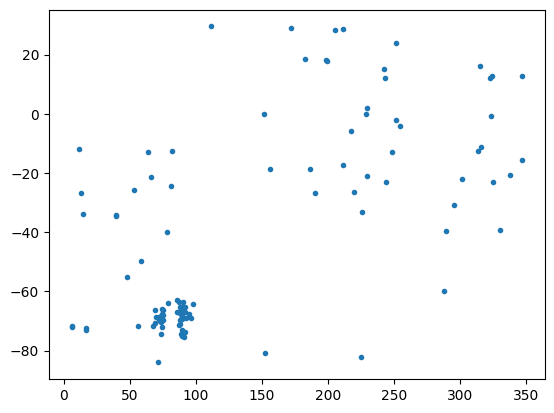

In [8]:
plt.plot(mask_df['ra'],mask_df['dec'],'.')

In [10]:
#np.savez(f'mask_data_files/mask_data_clusters', mask_df)